In [820]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # need to install
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import test3 as t # need to install
import seaborn as sns # need to install
%matplotlib inline

In [821]:
# observe calender csv
df_calendar = pd.read_csv('./data/calendar.csv')
df_calendar[df_calendar['listing_id']== 656909.0].head()
df_calendar['date_month'] = df_calendar['date'].map(lambda x: x[0:7])
df_calendar.head(5)

,listing_id,date,available,price,date_month
0,241032,2016-01-04,t,$85.00,2016-01
1,241032,2016-01-05,t,$85.00,2016-01
2,241032,2016-01-06,f,NaN,2016-01
3,241032,2016-01-07,f,NaN,2016-01
4,241032,2016-01-08,f,NaN,2016-01


In [830]:
# Get additional column with price as float
# replace value from string
df_calendar['price_float'] = df_calendar['price'].str.replace('$', '').str.replace(',','')
df_calendar = df_calendar[df_calendar['available'] == 't']
df_calendar['available_int'] = df_calendar['available'].str.replace('t', '1').str.replace('f','0')

# change datatype of column
df_price = df_calendar.astype({'price_float': 'float64','available_int':'int8'})
df_price[df_price['listing_id']== 656909.0].head()

,listing_id,date,available,price,date_month,price_float,available_int
931114,656909,2017-01-02,t,$64.00,2017-01,64.0,1


In [702]:
df_calendar['date'].describe()
print(df_calendar['date'].min()) # start date 2016-01-04
print(df_calendar['date'].max()) # end date 2017-01-02

2016-01-04
2017-01-02


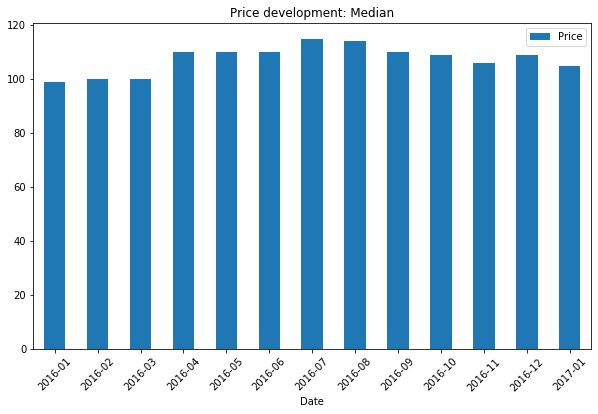

In [912]:
#Pricedevelopment over month: median
df_price_month = df_price[['date_month','price_float']].groupby('date_month')['price_float'].median().reset_index()
df_price_month.rename(columns={'date_month':'Date','price_float':'Price'}, inplace=True)

ax = df_price_month.plot.bar(x='Date', y='Price', rot=45,figsize=(10,6),title="Price development: Median")

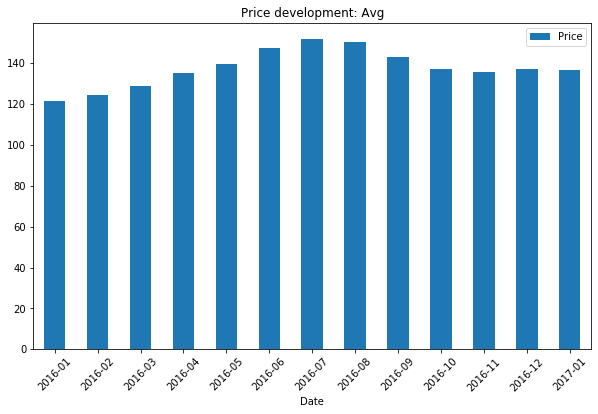

In [824]:
#Price development over month: mean

df_price_month_avg = df_price[['date_month','price_float']].groupby('date_month')['price_float'].mean().reset_index()
df_price_month_avg.rename(columns={'date_month':'Date','price_float':'Price'}, inplace=True)

ax = df_price_month_avg.plot.bar(x='Date', y='Price', rot=45,figsize=(10,6),title="Price development: Avg")

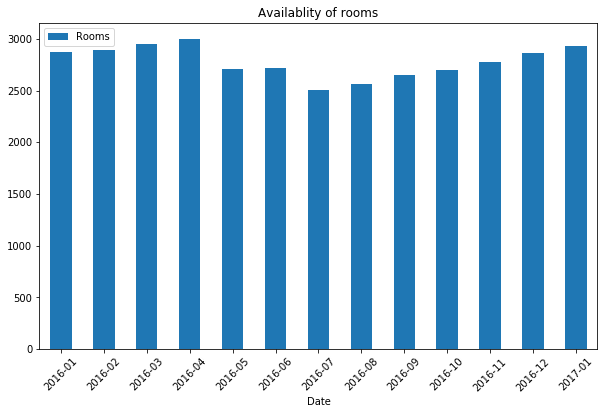

In [825]:
df_available = df_price[['date_month','listing_id']].groupby('date_month')['listing_id'].nunique().reset_index()
df_available.rename(columns={'date_month':'Date','listing_id':'Rooms'}, inplace=True)

ax = df_available.plot.bar(x='Date', y='Rooms', rot=45,figsize=(10,6),title="Availablity of rooms")

In [826]:
#read dataframe listings
df_list = pd.read_csv('./data/listings.csv')

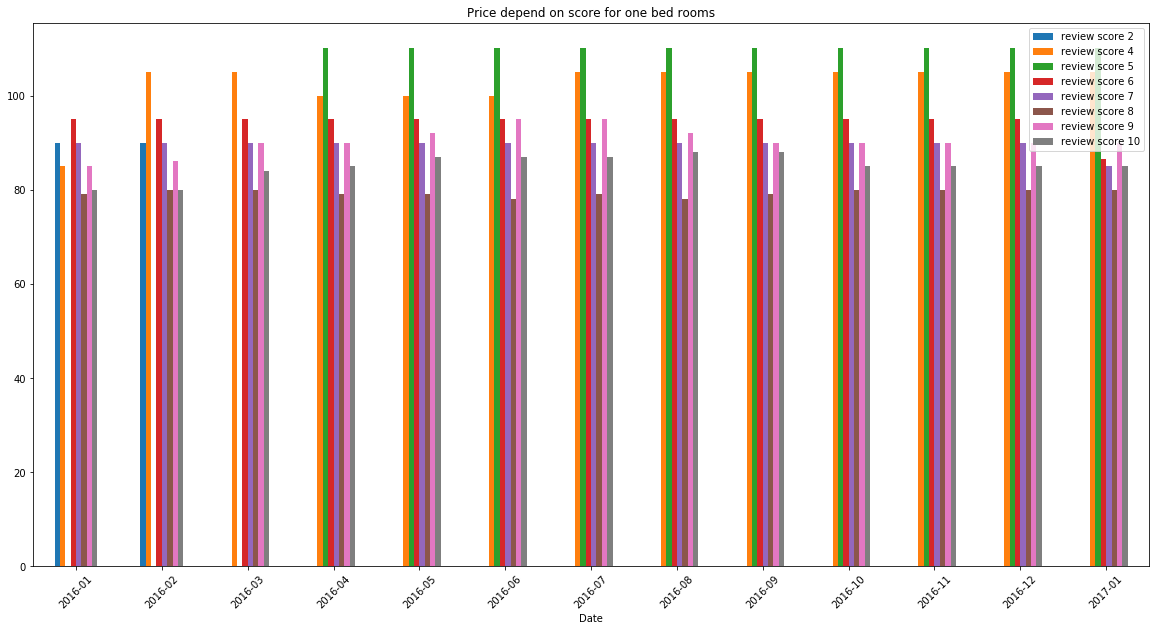

In [911]:
# Join with list table
df_price_rate = pd.merge(df_price,df_list[['id','beds','review_scores_value']],left_on='listing_id', right_on='id')

# Calculate average price
df_price_month_filtered = df_price_rate[['date_month','price_float','beds','review_scores_value']].groupby(['date_month','beds','review_scores_value'])['price_float'].median().reset_index()

# Filter only one bed rooms
df_price_month_bed = df_price_month_filtered[df_price_month_filtered['beds']==1]

# Pivot table according to scores
pivoted = df_price_month_bed.pivot(index='date_month', columns='review_scores_value', values='price_float')

# Recreate dataframe
df_price_month_bed = pd.DataFrame(pivoted.to_records())

# Fill nan with zeros
df_price_month_bed = df_price_month_bed.fillna(0)
df_price_month_bed.rename(columns={'date_month':'Date'}, inplace=True)
ax = df_price_month_bed.plot(x='Date', y=['2.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'], kind="bar",figsize=(20,10),rot=45, title="Price depend on score for one bed rooms")
ax.legend(['review score 2','review score 4','review score 5','review score 6','review score 7','review score 8','review score 9','review score 10']);

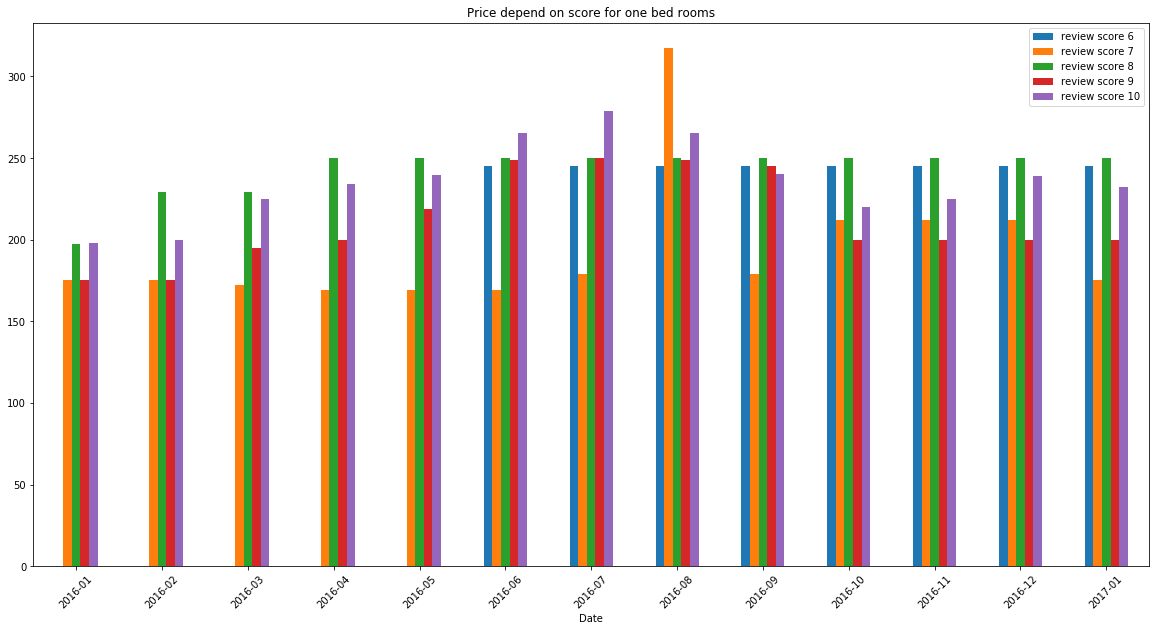

In [918]:
# Join with list table
df_price_rate = pd.merge(df_price,df_list[['id','beds','review_scores_value']],left_on='listing_id', right_on='id')

# Calculate average price
df_price_month_filtered = df_price_rate[['date_month','price_float','beds','review_scores_value']].groupby(['date_month','beds','review_scores_value'])['price_float'].median().reset_index()

# Filter only one bed rooms
df_price_month_bed = df_price_month_filtered[df_price_month_filtered['beds']==4]

# Pivot table according to scores
pivoted = df_price_month_bed.pivot(index='date_month', columns='review_scores_value', values='price_float')

# Recreate dataframe
df_price_month_bed = pd.DataFrame(pivoted.to_records())

# Fill nan with zeros
df_price_month_bed = df_price_month_bed.fillna(0)
df_price_month_bed.rename(columns={'date_month':'Date'}, inplace=True)
ax = df_price_month_bed.plot(x='Date', y=['6.0','7.0','8.0','9.0','10.0'], kind="bar",figsize=(20,10),rot=45, title="Price depend on score for one bed rooms")
ax.legend(['review score 6','review score 7','review score 8','review score 9','review score 10']);

In [921]:
# Create average price dataframe
df_room_price_avg = df_price[['listing_id','price_float']]
df_room_price_avg = df_room_price_avg.groupby('listing_id').agg('median').reset_index()

#merge dataframes list and calender
df_avg = pd.merge(df_price_avg, df_list, left_on='listing_id', right_on='id')
df_avg.head(1)

,listing_id,price_float,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3335,120.0,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN


In [922]:

df_avg = df_avg.dropna(subset=['zipcode'])
df_avg = df_avg.astype({'zipcode': 'int32'})
sns.heatmap(ddf_avg.corr(), annot=True, fmt=".2f");

ValueError: invalid literal for int() with base 10: '99\n98122'

In [437]:
# Calculate price (median) by ranking
df_book = df_best_merge[['review_scores_value','beds','booked']].groupby(['review_scores_value','beds']).agg('median')
df_price = df_best_merge[['review_scores_value','beds','price_float']].groupby(['review_scores_value','beds']).agg('median')
df_rpm = df_best_merge[['review_scores_value','beds','reviews_per_month']].groupby(['review_scores_value','beds']).agg('median')

# Join dataframes
df = df_book.merge(df_price, how='inner', on=['review_scores_value','beds'])
df = df.merge(df_rpm, how='inner', on=['review_scores_value','beds'])

# Sort dataframe
df.sort_values(['review_scores_value','beds'], ascending=False)

booked  price_float  reviews_per_month
review_scores_value beds                                          
10.0                9.0   0.901370   545.000000              0.160
                    8.0   0.769863    42.714287              2.570
                    6.0   0.705479   417.479340              1.855
                    5.0   0.783562   268.986481              0.895
                    4.0   0.638356   205.287354              0.860
                    3.0   0.746575   159.367645              1.000
                    2.0   0.739726   115.735291              1.745
                    1.0   0.756164    88.059525              2.000
9.0                 7.0   0.520548   536.400024              1.380
                    5.0   0.583562   267.535034              1.190
                    4.0   0.769863   187.000000              1.195
                    3.0   0.619178   186.798737              2.180
                    2.0   0.754795   128.921188              2.480
                    1.0   0.756164    93.939781              1.850
8.0                 5.0   0.600000   250.000000              0.190
                    4.0   0.634247   120.157303              1.705
                    3.0   0.835616   222.000000              0.860
                    2.0   0.756164   144.748291              0.445
                    1.0   0.678082   102.458328              0.565
7.0                 4.0   0.650685   137.209503              1.255
                    3.0   0.723288   120.904495              0.575
                    2.0   0.757534   177.500000              0.575
                    1.0   0.756164    90.000000              1.140
6.0                 1.0   0.926027   111.760735              0.810
4.0                 2.0   0.517808   250.000000              0.220
                    1.0   0.664384    96.590912              0.610
2.0                 1.0   0.843836    95.614037              1.000

In [920]:
#merge dataframes list and calender
df_total = pd.merge(df_booked, df_list, left_on='listing_id', right_on='id')
df_total = df_total[['id','price_float',,'name','review_scores_value','reviews_per_month','cancellation_policy','jurisdiction_names','accommodates','bathrooms','bedrooms','beds','guests_included','zipcode']]

df_total = df_total.dropna(subset=['zipcode']) # remove non values
df_total = df_total[df_total['zipcode'].str.isnumeric() == True] # remove non numeric values
df_total = df_total.astype({'zipcode': 'int32'})

sns.heatmap(df_total.corr(), annot=True, fmt=".2f");


SyntaxError: invalid syntax (<ipython-input-920-1432d1a28411>, line 3)

In [10]:
#observe csv
df_rev = pd.read_csv('./data/reviews.csv')
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


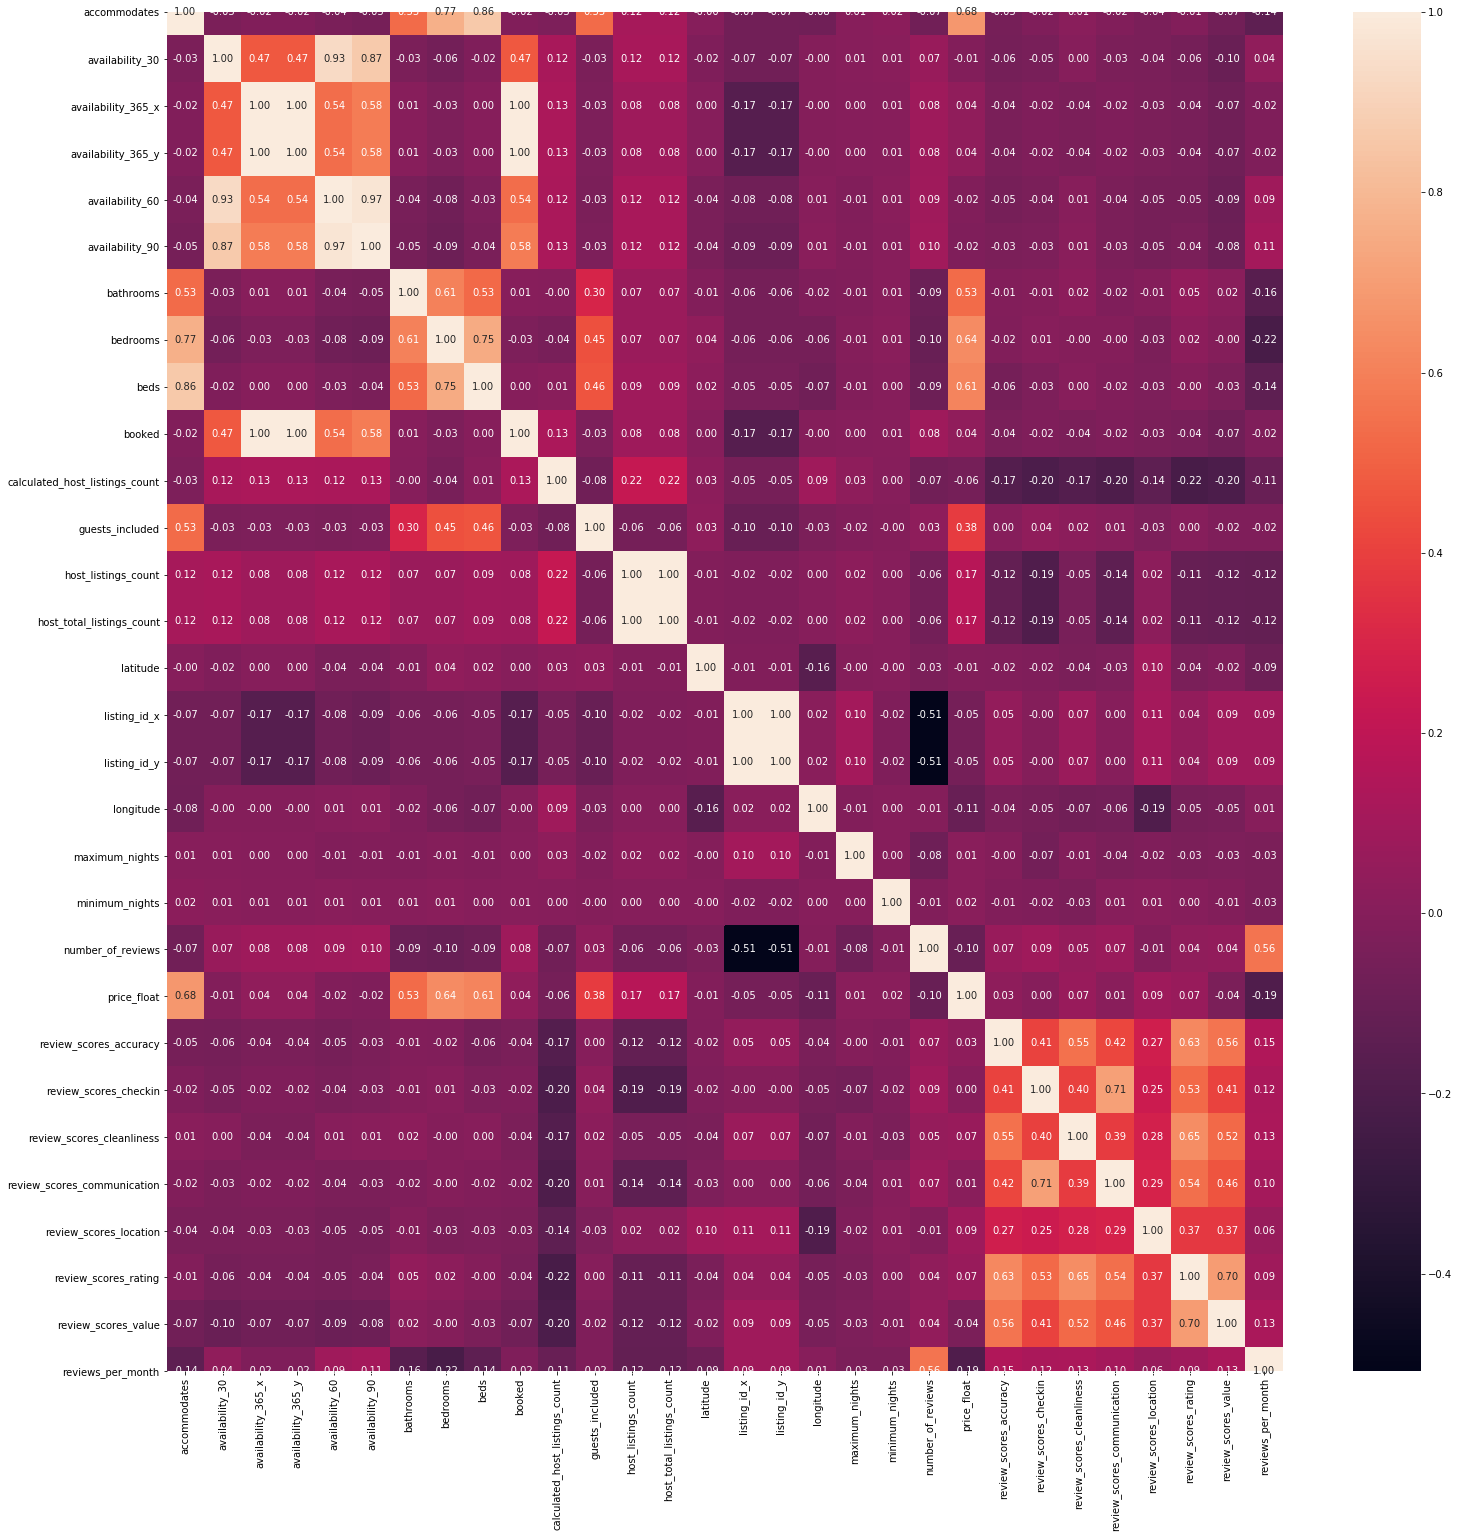

In [713]:
#read dataframe listings
#df_list_numeric = pd.read_csv('./data/listings.csv')

#take only numeric datatypes
df_list_numeric = df_avg.select_dtypes(include=['int64','float64']).copy()

#create list of columns with most missing values
most_missing_cols = list(df_list_numeric.columns[df_list_numeric.isnull().mean() > 0.5])

#most_missing_cols.extend(['latitude','longitude','scrape_id','id','host_listings_count','host_total_listings_count'])

# Drop columns with most nan values
df_list_numeric = df_list_numeric.drop(most_missing_cols,axis=1)

#Join Dataframes
df_list_numeric = pd.merge(df_booked, df_list_numeric, left_on='listing_id', right_on='id')

#df_list_numeric.head()
df_list_numeric = df_list_numeric.drop(columns=['id','host_id','scrape_id'])
df_list_numeric = df_list_numeric.reindex(sorted(df_list_numeric.columns), axis=1)

plt.subplots(figsize=(25,25))

#plt.subplots_adjust(bottom = 0.5)
sns.heatmap(df_list_numeric.corr(), annot=True, fmt=".2f");


In [480]:
# select columns
df_satisfaction = df_list_num[['host_id','beds','number_of_reviews','review_scores_value']]
# remove rows, which do not have a rating
df_satisfaction = df_satisfaction.dropna(subset=['review_scores_value'],axis=0)
df_satisfaction[['host_id','beds','number_of_reviews','review_scores_value']].groupby(['host_id','beds','number_of_reviews']).mean().sort_values(by=['number_of_reviews','review_scores_value'], ascending=False)

# Seems like number of beds have nothing to do with number of reviews


review_scores_value
host_id  beds number_of_reviews                     
1025723  1.0  474                                9.0
              466                                9.0
102684   2.0  404                               10.0
212740   1.0  353                                9.0
308927   1.0  320                               10.0
391714   1.0  319                                9.0
8993     1.0  297                               10.0
1382925  1.0  294                                9.0
187753   1.0  287                               10.0
555957   1.0  279                               10.0
934641   1.0  278                                9.0
759949   1.0  277                               10.0
2012892  1.0  270                               10.0
391714   1.0  265                                9.0
555957   1.0  263                               10.0
934641   1.0  255                                9.0
79450    1.0  244                               10.0
30832    1.0  240                               10.0
594315   1.0  238                                9.0
3023407  1.0  233                               10.0
6963318  1.0  233                                9.0
2612779  1.0  219                               10.0
601600   2.0  210                               10.0
2094547  1.0  209                               10.0
798892   1.0  207                               10.0
956883   1.0  207                               10.0
3401993  1.0  206                               10.0
2370749  1.0  204                               10.0
2569008  3.0  203                                9.0
1382925  1.0  193                                9.0
...                                              ...
18988566 2.0  1                                  8.0
21059456 1.0  1                                  8.0
22501560 2.0  1                                  8.0
22759920 4.0  1                                  8.0
23502285 1.0  1                                  8.0
24038354 1.0  1                                  8.0
24563934 2.0  1                                  8.0
24689607 4.0  1                                  8.0
24892993 3.0  1                                  8.0
25066447 4.0  1                                  8.0
26225330 1.0  1                                  8.0
26877490 1.0  1                                  8.0
33852132 1.0  1                                  8.0
34472831 1.0  1                                  8.0
37101658 2.0  1                                  8.0
37795322 1.0  1                                  8.0
38695481 5.0  1                                  8.0
39385924 2.0  1                                  8.0
44092821 1.0  1                                  8.0
44785869 2.0  1                                  8.0
46795487 3.0  1                                  8.0
3074414  2.0  1                                  7.0
1353882  1.0  1                                  6.0
1886546  2.0  1                                  6.0
5241841  1.0  1                                  6.0
6097842  1.0  1                                  6.0
3074414  1.0  1                                  5.0
2108094  2.0  1                                  4.0
40912620 1.0  1                                  4.0
46005243 1.0  1                                  2.0

[3077 rows x 1 columns]

In [ ]:
#read dataframe listings
#df_list_numeric = pd.read_csv('./data/listings.csv')

#take only numeric datatypes
df_list_numeric = df_avg.select_dtypes(include=['int64','float64']).copy()

#create list of columns with most missing values
most_missing_cols = list(df_list_numeric.columns[df_list_numeric.isnull().mean() > 0.5])

#most_missing_cols.extend(['latitude','longitude','scrape_id','id','host_listings_count','host_total_listings_count'])

# Drop columns with most nan values
df_list_numeric = df_list_numeric.drop(most_missing_cols,axis=1)

#Join Dataframes
df_list_numeric = pd.merge(df_booked, df_list_numeric, left_on='listing_id', right_on='id')

#df_list_numeric.head()
df_list_numeric = df_list_numeric.drop(columns=['id','host_id','scrape_id'])
df_list_numeric = df_list_numeric.reindex(sorted(df_list_numeric.columns), axis=1)

plt.subplots(figsize=(25,25))

#plt.subplots_adjust(bottom = 0.5)
sns.heatmap(df_list_numeric.corr(), annot=True, fmt=".2f");

In [ ]:
# Best accomondations
df_list = pd.read_csv('./data/listings.csv')
df_satisfaction = df_list[['host_id','number_of_reviews','review_scores_value']]

# remove rows, which do not have a rating
df_satisfaction = df_satisfaction.groupby(['host_id','review_scores_value'])['number_of_reviews'].sum().reset_index().sort_values(by=['number_of_reviews','review_scores_value'], ascending=False).head()
best_host = df_satisfaction['number_of_reviews'].max()

#Get Rooms with max reviews
df_satisfaction = df_satisfaction[df_satisfaction['number_of_reviews']==best_host]
best_rooms = pd.merge(df_list[['id','host_id','name','beds']],df_satisfaction, left_on='host_id', right_on='host_id')
best_rooms = pd.merge(df_price,best_rooms,left_on='listing_id', right_on='id')

# Get price over month for best rooms
best_rooms = best_rooms[['id','date_month','review_scores_value','price_float','name','beds']].groupby(['id','date_month','review_scores_value','name','beds'])['price_float'].median().reset_index()

#Create new name column
best_rooms['beds'] = best_rooms['beds'].astype(str) # change datatype to string
best_rooms['score'] = best_rooms['review_scores_value'].astype(str) # change datatype to string
best_rooms['name'] = best_rooms['name']+' - beds: ' + best_rooms['beds'] + ' - score: ' + best_rooms['score']

# Pivot table according to scores
pivoted = best_rooms.pivot(index='date_month', columns='name', values='price_float')

# Recreate dataframe
best_rooms = pd.DataFrame(pivoted.to_records())

best_rooms.rename(columns={'date_month':'Date'}, inplace=True) # rename column
cols = list(best_rooms.columns) # get list of columns
cols.pop(0) # remove first element

# Build plot
ax = best_rooms.plot(x='Date', y=cols, kind="bar",figsize=(20,10),rot=45, title="Price for best rooms")
